In [ ]:
#Neural Networks for Classification with TensorFlow

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
# the dataset contain the following features

list(data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [5]:
# the dataset contain the following labels

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# Getting features and labels 

X = data.data
y = data.target

In [7]:
# the features and labels are numpy array 

type(X)

numpy.ndarray

In [8]:
# To quickly look in data we can get the dataframe from X

data_df = pd.DataFrame(X, columns=data.feature_names)

In [9]:
#Taking a look in the data

In [10]:
# Looking from the head 

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Getting the basic information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
# Getting the basic stats

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
#Preparing the Data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [15]:
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 455
The number of testing samples: 114


In [16]:
# Scaling the features to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Creating, Compiling and Training a Model

In [18]:
# Creating a model 

# Getting the input shape

input_shape = X_train_scaled.shape[1:]

model_1 = tf.keras.models.Sequential([
                                      
              # The first layer has 30 neurons(or units)                    
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons 

              tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid. 
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')                     
]) 

# Compiling the model 

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics='accuracy')


In [19]:
# By setting validation_split=0.15, I am allocating 15% of the dataset to be used for evaluating the model during the training
# Model training returns model history(accuracy, loss, epochs...) 

history = model_1.fit(X_train_scaled, y_train, epochs=60, validation_split=0.15)

Epoch 1/60
13/13 [==============================] - 2s 70ms/step - loss: 0.6966 - accuracy: 0.4045 - val_loss: 0.6959 - val_accuracy: 0.3478
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5416 - val_loss: 0.6874 - val_accuracy: 0.5507
Epoch 3/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.6879 - val_loss: 0.6784 - val_accuracy: 0.7246
Epoch 4/60
13/13 [==============================] - 0s 6ms/step - loss: 0.6704 - accuracy: 0.8250 - val_loss: 0.6701 - val_accuracy: 0.8116
Epoch 5/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.8471 - val_loss: 0.6623 - val_accuracy: 0.8116
Epoch 6/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.8640 - val_loss: 0.6548 - val_accuracy: 0.7826
Epoch 7/60
13/13 [==============================] - 0s 6ms/step - loss: 0.6458 - accuracy: 0.8663 - val_loss: 0.6470 - val_accuracy: 0.7971
Epoch 8/60
13/13 [=

13/13 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.9382 - val_loss: 0.2690 - val_accuracy: 0.9275
Epoch 60/60
13/13 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.9407 - val_loss: 0.2649 - val_accuracy: 0.9275


In [20]:
#Visualizing the Results

<AxesSubplot:>

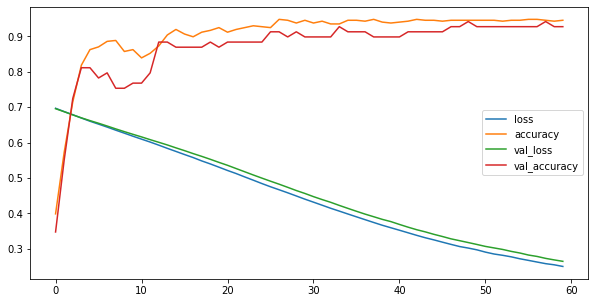

In [21]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

In [ ]:
 #Evaluating the Model

In [22]:
# Evaluating a model on unseen data: test set

model_eval = model_1.evaluate(X_test_scaled, y_test)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

4/4 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9474
Test loss: 0.2330283671617508
Test accuracy:0.9473684430122375


In [23]:
# ‼DON'T DO THIS!! X_test is not scaled. The results will be awful

model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 501.6193 - accuracy: 0.3772


[501.61932373046875, 0.37719297409057617]

In [25]:
# Getting the prediction

predictions = model_1.predict(X_test_scaled)

In [26]:
predictions[:15]

array([[0.6897869 ],
       [0.10359213],
       [0.22976717],
       [0.85075355],
       [0.8939003 ],
       [0.00703192],
       [0.01697829],
       [0.26786667],
       [0.47946215],
       [0.7716446 ],
       [0.81944335],
       [0.37748477],
       [0.7967313 ],
       [0.4576039 ],
       [0.7653238 ]], dtype=float32)

In [27]:
# Rounding the predictions to 0 and 1

predictions = tf.round(predictions)

In [28]:
 # Display the first 15 preds values 
 
predictions[:15]

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

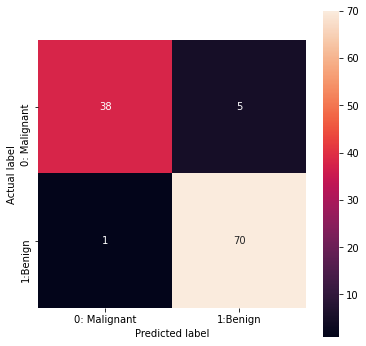

In [29]:
# Getting the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix 

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Malignant', '1:Benign'],
                        yticklabels=['0: Malignant', '1:Benign'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [30]:
# Classification report: F1 score, Recall, Precision

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
#Going Beyond Binary Classifier to Multiclass Classifier: 10 Fashions Classifier

In [ ]:
#Getting the Fashion data

In [31]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_train, fashion_train_label), (fashion_test, fashion_test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [32]:
#Looking in the Fashion Data

In [33]:
index = 10

# Get the pixels

fashion_train[index]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [34]:
# A list of label names

class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

This type of fashion is: T-shirt/top(0)


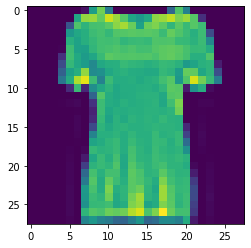

In [35]:

plt.imshow(fashion_train[index])

# Display the label

image_label = fashion_train_label[index]
print('This type of fashion is: {}({})'.format(class_names[image_label], image_label))

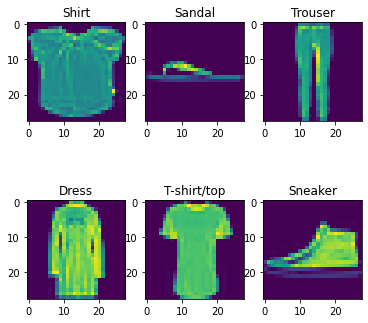

In [37]:
import random

plt.figure(figsize=(6,6))

for index in range(6):

  ax = plt.subplot(2,3, index+1)
  random_index = random.choice(range(len(fashion_train)))
  plt.imshow(fashion_train[random_index])
  plt.title(class_names[fashion_train_label[random_index]])

In [ ]:
# Getting the image shape

print('The shape of the whole training dataset:{}'.format(fashion_train[0].shape))
print('The shape of the first(and other)image:{}'.format(fashion_train[0].shape))

In [ ]:
#Preparing the Data

In [ ]:
# Scaling the image pixels to be between 0 and 1

fashion_train = fashion_train/255.0

fashion_test = fashion_test/255.0

In [ ]:
 #Creating, Compiling, and Training a Model

In [38]:
# Creating a model

fashion_classifier = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

])

# Compiling a model: Specifying a loss and optimization function

fashion_classifier.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
)

In [39]:
# Training a model
# Allocating 15% of training data to validation set

fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 4s 2ms/step - loss: 6.6819 - accuracy: 0.4585 - val_loss: 1.0842 - val_accuracy: 0.5722
Epoch 2/20
1594/1594 [==============================] - 3s 2ms/step - loss: 1.0254 - accuracy: 0.5960 - val_loss: 0.9348 - val_accuracy: 0.6162
Epoch 3/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.8706 - accuracy: 0.6603 - val_loss: 0.8918 - val_accuracy: 0.6569
Epoch 4/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.7671 - accuracy: 0.6907 - val_loss: 0.6736 - val_accuracy: 0.7322
Epoch 5/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.6415 - accuracy: 0.7363 - val_loss: 0.6452 - val_accuracy: 0.7294
Epoch 6/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5981 - accuracy: 0.7609 - val_loss: 0.6171 - val_accuracy: 0.7849
Epoch 7/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5635 - accuracy: 0.7921 - val_loss: 0.5843 - val_accuracy:

In [ ]:
 #Visualizing the Model Results

<AxesSubplot:>

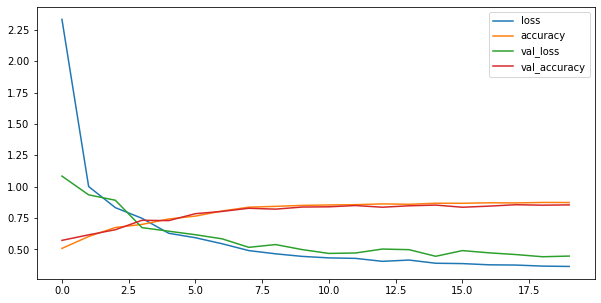

In [40]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(fashion_classifier.history.history)

# Plotting the loss and accuracy

loss_acc_metrics_df.plot(figsize=(10,5))

In [41]:
#Model Evaluation

In [42]:
# Evaluating the model on unseen data

eval = fashion_classifier.evaluate(fashion_test, fashion_test_label)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(eval[0],eval[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8506
Test loss: 0.4782685935497284
Test accuracy:0.850600004196167


In [ ]:
#Controlling Training with Callbacks

In [43]:
# Creating a same model as used before

def classifier():

  model = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

  ])

# Compiling a model: Specifying a loss and optimization function

  model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
  )

  return model

In [44]:
# Defining callbacks 

from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint('fashion_classifier.h5', save_best_only=True)

In [45]:
# Controlling training with callbacks

# Get the model

fashion_classifier_2 = classifier()

fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[callbacks])

Epoch 1/20
1594/1594 [==============================] - 4s 2ms/step - loss: 3.9086 - accuracy: 0.3835 - val_loss: 1.3155 - val_accuracy: 0.5694
Epoch 2/20
1594/1594 [==============================] - 3s 2ms/step - loss: 1.0532 - accuracy: 0.6213 - val_loss: 0.8292 - val_accuracy: 0.6851
Epoch 3/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.7385 - accuracy: 0.7123 - val_loss: 0.6998 - val_accuracy: 0.7497
Epoch 4/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.6159 - accuracy: 0.7806 - val_loss: 0.5843 - val_accuracy: 0.8013
Epoch 5/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5425 - accuracy: 0.8135 - val_loss: 0.5558 - val_accuracy: 0.8158
Epoch 6/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5138 - accuracy: 0.8256 - val_loss: 0.5207 - val_accuracy: 0.8179
Epoch 7/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4817 - accuracy: 0.8339 - val_loss: 0.4926 - val_accuracy:

In [46]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

In [47]:
# Combining Early stopping and Model Check point

# Getting the model 

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[callbacks, early_stop])

Epoch 1/100
1594/1594 [==============================] - 4s 2ms/step - loss: 5.3607 - accuracy: 0.6611 - val_loss: 0.6991 - val_accuracy: 0.7826
Epoch 2/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.6819 - accuracy: 0.7753 - val_loss: 0.6625 - val_accuracy: 0.7869
Epoch 3/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5821 - accuracy: 0.7995 - val_loss: 0.5535 - val_accuracy: 0.8150
Epoch 4/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5379 - accuracy: 0.8129 - val_loss: 0.5728 - val_accuracy: 0.7874
Epoch 5/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5026 - accuracy: 0.8231 - val_loss: 0.4791 - val_accuracy: 0.8367
Epoch 6/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4810 - accuracy: 0.8304 - val_loss: 0.5711 - val_accuracy: 0.8107
Epoch 7/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4604 - accuracy: 0.8383 - val_loss: 0.4942 - val_ac

In [ ]:
#Custom Callback

In [48]:
# Custom callbacks

class callback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if (logs.get('accuracy') > 0.95):

      print('\n Training is cancelled at an accuracy of 95%')
      self.model.stop_training = True


# Call callbacks

custom_callback = callback()

In [49]:
# Implementing custom ballback

# Getting the model 

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[custom_callback])

Epoch 1/100
1594/1594 [==============================] - 5s 3ms/step - loss: 5.7600 - accuracy: 0.6412 - val_loss: 0.7575 - val_accuracy: 0.7548
Epoch 2/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.6422 - accuracy: 0.7833 - val_loss: 0.6392 - val_accuracy: 0.7699
Epoch 3/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5637 - accuracy: 0.7990 - val_loss: 0.5652 - val_accuracy: 0.8102
Epoch 4/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5203 - accuracy: 0.8150 - val_loss: 0.5062 - val_accuracy: 0.8258
Epoch 5/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4862 - accuracy: 0.8285 - val_loss: 0.5568 - val_accuracy: 0.7997
Epoch 6/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8301 - val_loss: 0.4896 - val_accuracy: 0.8382
Epoch 7/100
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8388 - val_loss: 0.4748 - val_ac

1594/1594 [==============================] - 4s 2ms/step - loss: 0.3256 - accuracy: 0.8846 - val_loss: 0.5313 - val_accuracy: 0.8553
Epoch 58/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3234 - accuracy: 0.8847 - val_loss: 0.5313 - val_accuracy: 0.8547
Epoch 59/100
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3203 - accuracy: 0.8860 - val_loss: 0.5138 - val_accuracy: 0.8566
Epoch 60/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8842 - val_loss: 0.5156 - val_accuracy: 0.8606
Epoch 61/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3255 - accuracy: 0.8858 - val_loss: 0.5412 - val_accuracy: 0.8591
Epoch 62/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3284 - accuracy: 0.8838 - val_loss: 0.5226 - val_accuracy: 0.8621
Epoch 63/100
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3305 - accuracy: 0.8836 - val_loss: 0.5533 - val_accuracy

In [ ]:
#Using TensorBoard for Model Visualization

In [50]:
# Load the Tensorboard notebook extension
# And import datetime

%load_ext tensorboard

In [51]:
!rm -rf ./logs/

In [52]:
# Getting the model 

fashion_classifier = classifier()

In [53]:
# Create a callback

tfboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [54]:
fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[tfboard_callback])

Epoch 1/20
1594/1594 [==============================] - 4s 2ms/step - loss: 7.2441 - accuracy: 0.6391 - val_loss: 0.7775 - val_accuracy: 0.7194
Epoch 2/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.7142 - accuracy: 0.7539 - val_loss: 0.6674 - val_accuracy: 0.7699
Epoch 3/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.6187 - accuracy: 0.7883 - val_loss: 0.5851 - val_accuracy: 0.7997
Epoch 4/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5762 - accuracy: 0.8038 - val_loss: 0.5596 - val_accuracy: 0.8027
Epoch 5/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5411 - accuracy: 0.8134 - val_loss: 0.5516 - val_accuracy: 0.8123
Epoch 6/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5201 - accuracy: 0.8234 - val_loss: 0.5235 - val_accuracy: 0.8159
Epoch 7/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5016 - accuracy: 0.8263 - val_loss: 0.4921 - val_accuracy:

In [55]:
%tensorboard --logdir logs